Holly Houliston 

13th April 2023

Desciption - using OpenCV package to explore colour thresholding techniques using a drone image of a humpback whale 

Special thanks to the Duke Marine Robotics and Remote Sensing Lab for the image

In [1]:
# import packages 
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import numpy as np
from matplotlib.colors import hsv_to_rgb


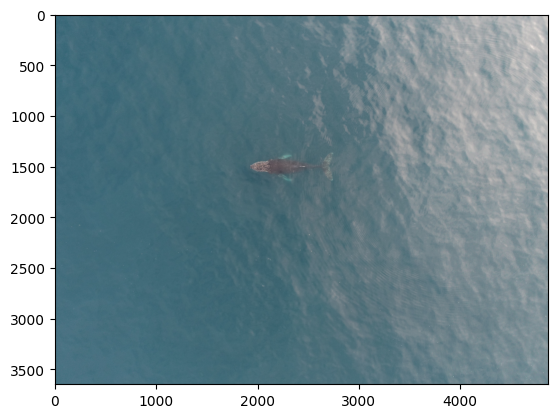

In [ ]:
# read in whale image and plot it 
whale = cv2.imread("CV4E_application/img/200115_P_F1_DJI_0001.JPG") # read
whale = cv2.cvtColor(whale, cv2.COLOR_BGR2RGB) # change channels
plt.imshow(whale) # plot
plt.show()

In [ ]:
# view whale image in RGB space 
# split whale image into 3 channels - red, green, blue
r, g, b = cv2.split(whale)

In [ ]:
%matplotlib inline

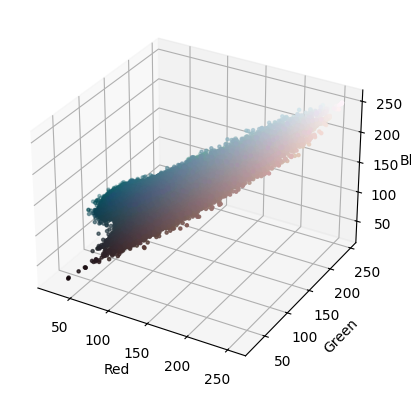

In [15]:
# set up 3D plot
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

# color each pixel according to its true color: reshaping and normalization 
pixel_colors = whale.reshape((np.shape(whale)[0]*np.shape(whale)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

# build scatter plot and view it 
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

# Segments of whale which span entire range of RGB values
# Segmenting whale out in RGB space based on ranges of RGB would not be easy 



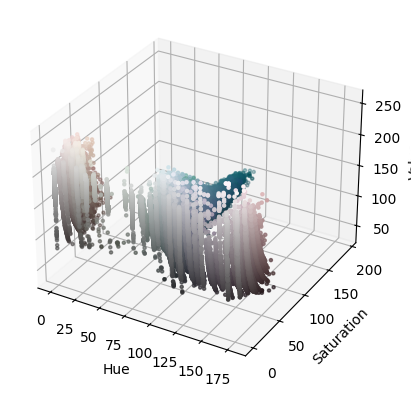

In [16]:
# convert from RGB (red, green, blue) to HSV (hue, saturation and value)
hsv_whale = cv2.cvtColor(whale, cv2.COLOR_RGB2HSV)

# view whale image in h,s,v
h, s, v = cv2.split(hsv_whale)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

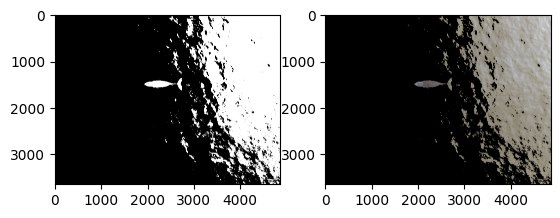

In [58]:
# Convert whale image to HSV
hsv_whale = cv2.cvtColor(whale, cv2.COLOR_BGR2HSV)

# HSV thresholds to detect gray areas
lower_white = np.array([0, 0, 200])     # low sat, high brightness
upper_white = np.array([179, 40, 255])  # slightly relaxed saturation

# Create the mask
mask_black = cv2.inRange(hsv_whale, lower_gray, upper_gray)

# Apply the mask
result_black = cv2.bitwise_and(whale, whale, mask=mask_black)

# Show mask and result
plt.subplot(1, 2, 1)
plt.imshow(mask_black, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_black, cv2.COLOR_BGR2RGB))
plt.show()